In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import *



In [11]:

iris = load_iris()





In [12]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
AdaC =AdaBoostClassifier(n_estimators=400,learning_rate=0.5)
AdaC.fit(X_train,y_train)
print('Accuracy on AdaBoost: {:.2f}'.format(AdaC.score(X_test, y_test)))

In [4]:
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf_entropy.fit(X_train, y_train)

print('Accuracy on Gini: {:.2f}'.format(clf_gini.score(X_test, y_test)))
print('Accuracy on Entropy: {:.2f}'.format(clf_entropy.score(X_test, y_test)))

Accuracy on Gini: 0.98
Accuracy on Entropy: 0.91


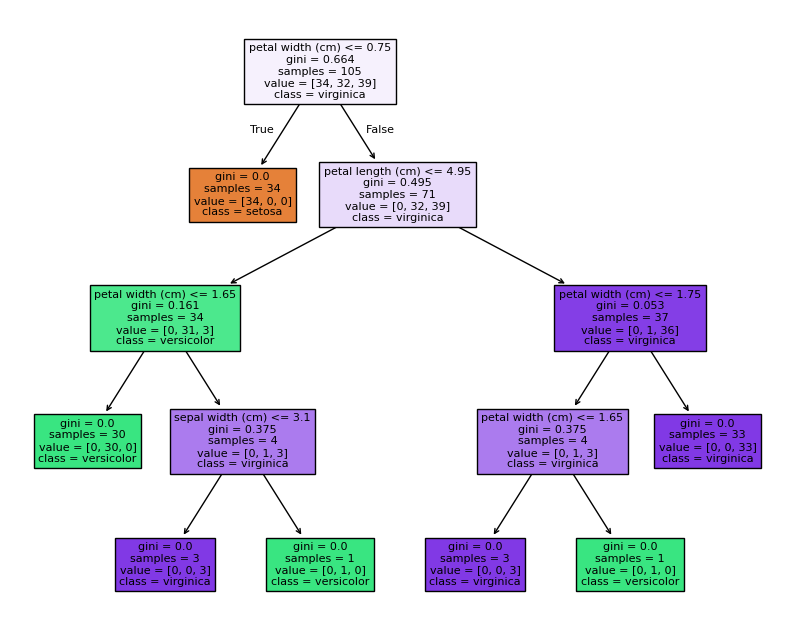

In [5]:
fig = plt.figure(figsize=(10,8))
annotation=tree.plot_tree(clf_gini, feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True
                   )

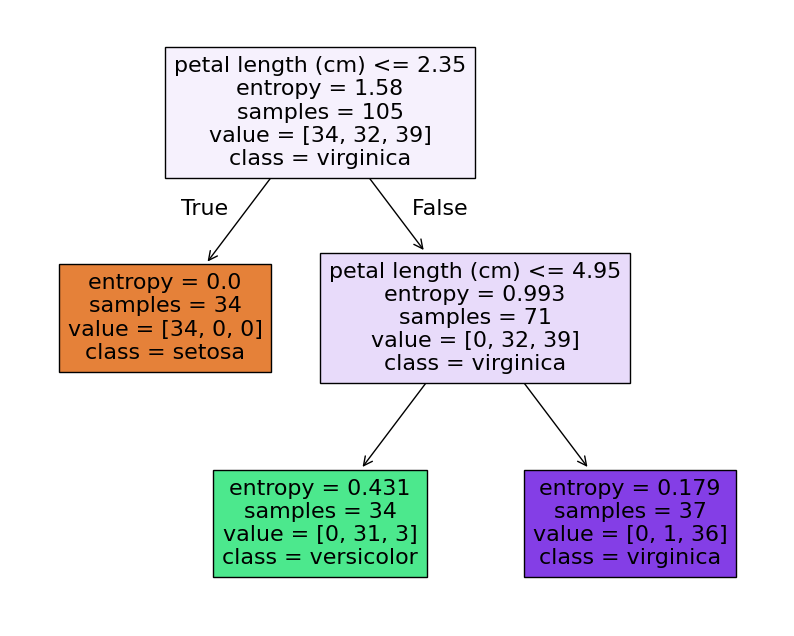

In [6]:
fig = plt.figure(figsize=(10,8))
annotation=tree.plot_tree(clf_entropy, feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True
                   )

In [7]:
print(iris.feature_names)
Output = clf_entropy.predict([[5,2,3.5,1]])
if Output[0]==0:
  print("Setosa")
elif Output[0]==1:
  print("Versicolor")
else:
  print("Virginica")

clf_entropy.predict_proba([[5,2,3.5,1]])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Versicolor


array([[0.        , 0.91176471, 0.08823529]])

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = clf_gini.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])